# Loading

In [1]:
import tobii_research as tr
from utils import *

def get_tracker():
  all_eyetrackers = tr.find_all_eyetrackers()

  for tracker in all_eyetrackers:
    print("Model: " + tracker.model)
    print("Serial number: " + tracker.serial_number) 
    print(f"Can stream eye images: {tr.CAPABILITY_HAS_EYE_IMAGES in tracker.device_capabilities}")
    print(f"Can stream gaze data: {tr.CAPABILITY_HAS_GAZE_DATA in tracker.device_capabilities}")
    return tracker

tracker = get_tracker()

data, dict = build_dataset(tracker, 'title', tot_time_min=0.1, time_step_sec=0.1)

Model: Tobii Pro Fusion
Serial number: TPFC6-010203104285
Can stream eye images: True
Can stream gaze data: True


NameError: name 'global_gaze_data' is not defined

In [ ]:
data.to_csv("evan_look_left.csv")

In [ ]:
# import time

# def gaze_data_callback(gaze_data):
#   global global_gaze_data
#   global_gaze_data = gaze_data
  
# def gaze_data(eyetracker, wait_time=5):
#   global global_gaze_data

#   print("Getting data...")
#   eyetracker.subscribe_to(tr.EYETRACKER_GAZE_DATA, gaze_data_callback, as_dictionary=True)

#   time.sleep(wait_time)

#   eyetracker.unsubscribe_from(tr.EYETRACKER_GAZE_DATA, gaze_data_callback)

#   return global_gaze_data
  
# data = gaze_data(tracker)
# data

Getting data...


{'device_time_stamp': 890952768,
 'system_time_stamp': 333077828558,
 'left_gaze_point_on_display_area': (0.17883707582950592,
  0.003639146452769637),
 'left_gaze_point_in_user_coordinate_system': (-60.59334182739258,
  118.52195739746094,
  32.49665832519531),
 'left_gaze_point_validity': 1,
 'left_pupil_diameter': 5.0716400146484375,
 'left_pupil_validity': 1,
 'left_gaze_origin_in_user_coordinate_system': (-192.70730590820312,
  -92.11940002441406,
  701.1041259765625),
 'left_gaze_origin_in_trackbox_coordinate_system': (0.8749958276748657,
  0.6833948493003845,
  0.6267613768577576),
 'left_gaze_origin_validity': 1,
 'right_gaze_point_on_display_area': (-0.013065677136182785,
  0.06947140395641327),
 'right_gaze_point_in_user_coordinate_system': (-96.79935455322266,
  111.22730255126953,
  29.841655731201172),
 'right_gaze_point_validity': 1,
 'right_pupil_diameter': 5.419677734375,
 'right_pupil_validity': 1,
 'right_gaze_origin_in_user_coordinate_system': (-129.60992431640625,
 

# Visualizations

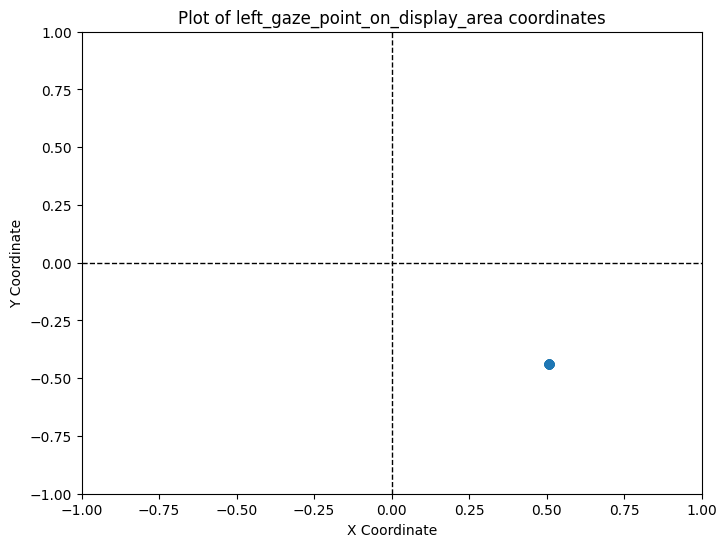

In [ ]:
from matplotlib import pyplot as plt

# plot coordinates (you can use this for testing or for funsies)
# takes in a dataframe (call build_dataset first)
#          and a column_name (string)

def translate2ScreenX(xcoord):
    return 2*xcoord - 1

def translate2ScreenY(ycoord):
    return -2*ycoord + 1

def plot_coordinates(dataframe, column_name):
    # extract x and y coordinates from the specified column
    x_values = [point[0] for point in dataframe[column_name]]
    y_values = [point[1] for point in dataframe[column_name]]
    x_values = list(map(translate2ScreenX, x_values))
    y_values = list(map(translate2ScreenY, y_values))

    
    # plot the coordinates
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, marker='o', label=column_name)
    plt.title(f'Plot of {column_name} coordinates')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.show()
    
plot_coordinates(data, 'left_gaze_point_on_display_area')


# Make eye detection functions

In [ ]:
import pandas as pd

df = pd.read_csv('sample.csv')
df.head()

,Unnamed: 0,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
0,timestep_1,386784515,341698244858,"(-0.0045711020939052105, 0.7971394062042236)","(-95.19669342041016, 30.59694480895996, 0.4945...",1,4.534882,1,"(-65.64801025390625, -41.93953323364258, 631.7...","(0.6404919624328613, 0.5918063521385193, 0.419...",1,"(0.03927545249462128, 0.8470975160598755)","(-86.92423248291016, 25.061256408691406, -1.52...",1,4.431961,1,"(-9.278083801269531, -39.46855926513672, 629.2...","(0.5199826955795288, 0.5863301157951355, 0.406...",1,title
1,timestep_2,387309536,341698769877,"(0.15745361149311066, 0.6064290404319763)","(-64.62773132324219, 51.728912353515625, 8.185...",1,4.211044,1,"(-65.76103973388672, -41.07779312133789, 631.7...","(0.6407318115234375, 0.5899651646614075, 0.419...",1,"(0.22485633194446564, 0.3682590425014496)","(-51.91095733642578, 78.11968994140625, 17.791...",1,4.533829,1,"(-9.37478256225586, -38.79711151123047, 629.55...","(0.5201849937438965, 0.5848676562309265, 0.406...",1,title
2,timestep_3,387809555,341699269888,"(0.3255935609340668, 0.5627170205116272)","(-32.90501022338867, 56.57248306274414, 9.9488...",1,4.357651,1,"(-65.70089721679688, -41.23841094970703, 629.6...","(0.6411513090133667, 0.5905323028564453, 0.414...",1,"(0.4049111008644104, 0.5219427943229675)","(-17.940284729003906, 61.090518951416016, 11.5...",1,4.440720,1,"(-9.161250114440918, -39.38029479980469, 627.9...","(0.5197766423225403, 0.5862635374069214, 0.403...",1,title
3,timestep_4,388384586,341699844870,"(0.48616281151771545, 0.47686275839805603)","(-2.6106374263763428, 66.08567810058594, 13.41...",1,4.496201,1,"(-65.81904602050781, -41.13301086425781, 629.1...","(0.6415217518806458, 0.5903550386428833, 0.413...",1,"(0.555518627166748, 0.3840618431568146)","(10.474626541137695, 76.36864471435547, 17.154...",1,4.524231,1,"(-9.314687728881836, -39.12511444091797, 627.4...","(0.520130455493927, 0.5857735872268677, 0.4023...",1,title
4,timestep_5,388884609,341700344849,"(0.752032995223999, 0.35454174876213074)","(47.550689697265625, 79.63966369628906, 18.344...",1,4.361450,1,"(-65.45330810546875, -40.62702178955078, 628.9...","(0.6407973766326904, 0.5892903804779053, 0.412...",1,"(0.8020283579826355, 0.2453044354915619)","(56.983253479003906, 91.74386596679688, 22.750...",1,4.449951,1,"(-8.983160018920898, -38.711334228515625, 627....","(0.5194064974784851, 0.5848553776741028, 0.402...",1,title


In [ ]:
df_row = df.head(1)
df_row

,Unnamed: 0,device_time_stamp,system_time_stamp,left_gaze_point_on_display_area,left_gaze_point_in_user_coordinate_system,left_gaze_point_validity,left_pupil_diameter,left_pupil_validity,left_gaze_origin_in_user_coordinate_system,left_gaze_origin_in_trackbox_coordinate_system,left_gaze_origin_validity,right_gaze_point_on_display_area,right_gaze_point_in_user_coordinate_system,right_gaze_point_validity,right_pupil_diameter,right_pupil_validity,right_gaze_origin_in_user_coordinate_system,right_gaze_origin_in_trackbox_coordinate_system,right_gaze_origin_validity,type
0,timestep_1,386784515,341698244858,"(-0.0045711020939052105, 0.7971394062042236)","(-95.19669342041016, 30.59694480895996, 0.4945...",1,4.534882,1,"(-65.64801025390625, -41.93953323364258, 631.7...","(0.6404919624328613, 0.5918063521385193, 0.419...",1,"(0.03927545249462128, 0.8470975160598755)","(-86.92423248291016, 25.061256408691406, -1.52...",1,4.431961,1,"(-9.278083801269531, -39.46855926513672, 629.2...","(0.5199826955795288, 0.5863301157951355, 0.406...",1,title


In [ ]:
# example
# function should accept a dictionary of gaze data (look at what the gaze_data function returns)
# when we call build_dataset, we also make a call to gaze_data, so we'll be able to 
# modify build_dataset to check for movement detection at every timestep.

# things to consider:
# this sample code only takes in one row/timestep
# if we want to use acceleration or speed of eye movements,
# we need to look at multiple rows at a time


def detect_movement_example(data_dict):
    # data_dict should only have 1 row
    assert(len(data_dict) == 1)  # remove this in practice, just keeping it here for initial testing
    
    # get the first (and only) row in data_dict
    eye_data = data_dict.iloc[0]
        
    # get eye coordinates
    left_x, left_y = data_dict.left_gaze_point_on_display_area[0]
    right_x, right_y = data_dict.right_gaze_point_on_display_area[0]
    
    # do some kind of detection
    print(left_x)
    direction = math.atan(left_y/left_x)
    magnitude = math.sqrt(left_x**2 + left_y**2)
    return direction, magnitude
    
# test your function
data2 = pd.DataFrame(df.iloc[0]).transpose()  # call build_dataset and get a row
detect_movement_example(data2)                  # call detect_movement


ValueError: too many values to unpack (expected 2)

In [ ]:
# functions
# left
# right
# up - forward
# down - reverse
# eye roll

In [ ]:
# try incorporating your function into a modified build_dataset, 
# so you can test your movement detection function while recording data

# make modifications here:

def modified_build_dataset(tracker, label, add_on = False, df_orig = pd.DataFrame(), 
                  time_step_sec = 0.5, tot_time_min = 0.1):
    
    global global_gaze_data
    
    intervals = math.ceil((tot_time_min * 60) / time_step_sec)
    dict_list = []
    
    for _ in range(intervals):
        data = gaze_data(tracker, time_step_sec)
        dict_list.append(data)
    
    tot_dict = combine_dicts_with_labels(dict_list)
    df = pd.DataFrame(tot_dict).T
    df['type'] = label
        
    if add_on:
        df_new = pd.concat([df_orig, df])
        df_new = df_new.reset_index(drop=True)
        return df_new
    
    else:
        return df, dict_list